In [1]:
# Find the base for various numbers of mixture signals.
# Select them according to the approximation error.
# This demo inherits the test from the file 13_Exhaustive_Base.ipynb

import numpy as np
import matplotlib.pyplot as plt
from functions import *
from dataload import (load_data, get_clusters, gen_base, next_sample_dset)
from experiment import FeatureSelection
from plots import plt_clust_Xyy

In [2]:
# Load data and data basis
iqdata, iqnoise = load_data()
dbasis = get_clusters()

# Create a data generator and the main class instance
# The indices of base centroids in iqdata
idx_Abase = list(dbasis.keys())
Abase = iqdata[idx_Abase].transpose()

In [3]:
# How to use the data:
# Generate a new dset with randomly mixed signals as y plus a noise of the desired level
# The parameters of the computational experiment
n_models = 6 # Number of alternative models
n_classes = 5 # Maximum number in mixure
n_samples = 100 # Sample size
noise_level = 1. # Expected noise level

In [4]:
# One run of the algorithm
n_mixed = 3 # Number signals in the mixture
class_sizes =  np.zeros(n_classes, dtype=int) # Dataset generation parameters
class_sizes[n_mixed] = n_samples
# Generate the new noisy dset of mixtures and create a data sample generator
# dset = get_dset(class_sizes, noise_level)
dset = gen_base(iqdata, iqnoise, dbasis, cls_sizes=class_sizes, noise_level=noise_level)
get_next_sample = next_sample_dset(dset, idx_Abase)
answer_y, answer_A, answer_X, _, _ = next(get_next_sample)
# Initialize the instance
fs = FeatureSelection(Abase, max_models = n_models) # Reset the list of models
fs.MAX_BASIS = n_mixed
# Find signal separation I/Q data
fs.run(answer_y)
best_A = fs.best_model()['fea'] # The indices of tags
len_resolved = len(set(answer_A) & set(best_A))
error = fs.best_model()['err']
y1 = fs.best_y()


Resolved: 2 Answer: [10, 12, 25] Model: [10, 19, 12]


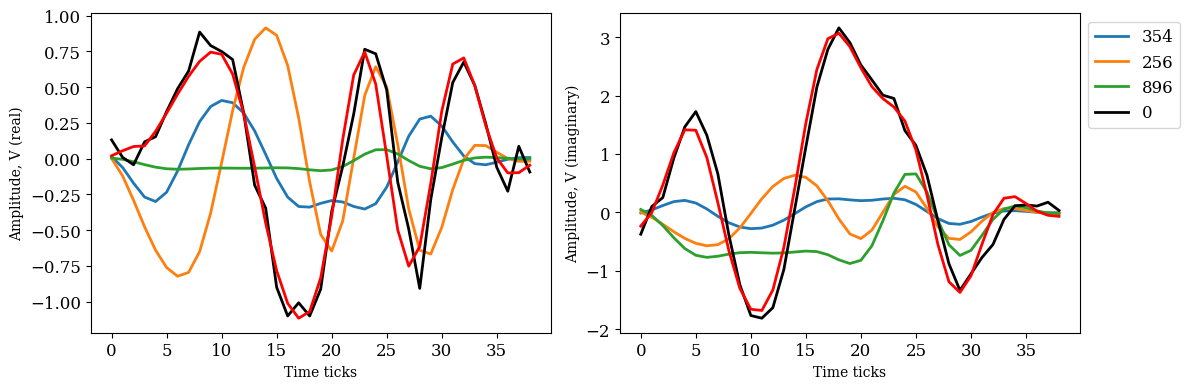

In [5]:
print('Resolved:', len_resolved,  'Answer:', answer_A, 'Model:', best_A)#
plt_clust_Xyy(iqdata[answer_X], answer_y, y1, answer_X, 0, 0, demo=True)